<a href="https://colab.research.google.com/github/emanadel211/GRS/blob/main/Eman_Adel_Risk_Score_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Genetic Risk Score

Data Processing

In [ ]:
#installing needed libraries
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading the dataset
genotype = pd.read_table("https://github.com/ahmedmoustafa/datasets/blob/main/genetic_risk_score/genotypes.tsv?raw=True")

In [ ]:
genotype.shape

(1000, 6)

In [ ]:
genotype.head()

,individual_id,rs13266634,rs1801282,rs4402960,rs5219,rs7903146
0,1,CA,AA,AA,TT,AA
1,2,CA,GA,AA,TT,AA
2,3,CC,AA,AA,TT,AA
3,4,AA,GG,AA,TT,TT
4,5,CA,AA,AA,AT,AA


Methdology

Adding a new column to the dataframe that includes the natural log of the odds ratio associated with risk alleles in each position.

In [ ]:
#first position
genotype.loc[genotype["rs13266634"]=="CA", "odds_ratio1"] = np.log(1.6)
genotype.loc[genotype["rs13266634"]=="CC", "odds_ratio1"] = np.log(1.6)*2
genotype.loc[genotype["rs13266634"]=="AA", "odds_ratio1"] = np.log(1.6)*0

In [ ]:
#second position
genotype.loc[genotype["rs1801282"] == "GA", "odds_ratio2"] = np.log(1.3)
genotype.loc[genotype["rs1801282"] == "GG", "odds_ratio2"] = np.log(1.3)*2
genotype.loc[genotype["rs1801282"] == "AA", "odds_ratio2"] = np.log(1.3)*0

In [ ]:
#third position
genotype.loc[genotype["rs4402960"] == "GA", "odds_ratio3"] = np.log(1.5)
genotype.loc[genotype["rs4402960"] == "GG", "odds_ratio3"] = np.log(1.5)*2
genotype.loc[genotype["rs4402960"] == "AA", "odds_ratio3"] = np.log(1.5)*0

In [ ]:
#forth position
genotype.loc[genotype["rs5219"] == "AT", "odds_ratio4"] = np.log(1.2)
genotype.loc[genotype["rs5219"] == "AA", "odds_ratio4"] = np.log(1.2)*2
genotype.loc[genotype["rs5219"] == "TT", "odds_ratio4"] = np.log(1.2)*0

In [ ]:
#fifth position
genotype.loc[genotype['rs7903146'] == 'TA', 'odds_ratio5'] = np.log(1.4)
genotype.loc[genotype['rs7903146'] == 'TT', 'odds_ratio5'] = np.log(1.4)*2
genotype.loc[genotype['rs7903146'] == 'AA', 'odds_ratio5'] = np.log(1.4)*0

In [ ]:
genotype.head()

,individual_id,rs13266634,rs1801282,rs4402960,rs5219,rs7903146,odds_ratio1,odds_ratio2,odds_ratio3,odds_ratio4,odds_ratio5
0,1,CA,AA,AA,TT,AA,0.470004,0.000000,0.0,0.000000,0.000000
1,2,CA,GA,AA,TT,AA,0.470004,0.262364,0.0,0.000000,0.000000
2,3,CC,AA,AA,TT,AA,0.940007,0.000000,0.0,0.000000,0.000000
3,4,AA,GG,AA,TT,TT,0.000000,0.524729,0.0,0.000000,0.672944
4,5,CA,AA,AA,AT,AA,0.470004,0.000000,0.0,0.182322,0.000000


Adding a new column that includes the sum of the natural log of all risk alleles across all positions

In [ ]:
for ind, row in genotype.iterrows():
  genotype.loc[ind, 'GRS'] = row["odds_ratio1"] + row["odds_ratio2"] + row["odds_ratio3"] + row["odds_ratio4"] + row["odds_ratio5"]

In [ ]:
genotype.head()

,individual_id,rs13266634,rs1801282,rs4402960,rs5219,rs7903146,odds_ratio1,odds_ratio2,odds_ratio3,odds_ratio4,odds_ratio5,GRS
0,1,CA,AA,AA,TT,AA,0.470004,0.000000,0.0,0.000000,0.000000,0.470004
1,2,CA,GA,AA,TT,AA,0.470004,0.262364,0.0,0.000000,0.000000,0.732368
2,3,CC,AA,AA,TT,AA,0.940007,0.000000,0.0,0.000000,0.000000,0.940007
3,4,AA,GG,AA,TT,TT,0.000000,0.524729,0.0,0.000000,0.672944,1.197673
4,5,CA,AA,AA,AT,AA,0.470004,0.000000,0.0,0.182322,0.000000,0.652325


Visualization of results

Statistical analysis of the GRS by calculating the mean, median, and standard deviation.

In [ ]:
genotype["GRS"].mean()

0.9936450862908708

In [ ]:
genotype["GRS"].median()

0.9301936370431465

In [ ]:
genotype["GRS"].std()

0.4979373505565908

In [ ]:
genotype["GRS"].max()

2.8685677692116713

In [ ]:
genotype["GRS"].min()

0.0

In [ ]:
#the most repeated value
genotype["GRS"].mode()

0    0.741937
Name: GRS, dtype: float64

In [ ]:
#the count of the most reptited values
genotype['GRS'].value_counts()

0.741937    36
0.470004    28
0.518794    27
1.394263    26
0.336472    26
            ..
1.870201     1
2.175421     1
2.255463     1
1.721165     1
1.854453     1
Name: GRS, Length: 162, dtype: int64

Visualization of the GRS distribution

<function matplotlib.pyplot.show(close=None, block=None)>

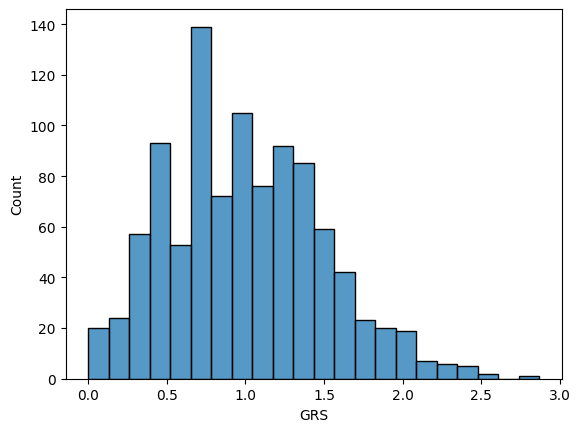

In [ ]:
sns.histplot(data=genotype, x="GRS")
plt.show

In [ ]:
genotype_descending = genotype.sort_values(by=['GRS'], ascending=False)

In [ ]:
genotype_descending.head()

,individual_id,rs13266634,rs1801282,rs4402960,rs5219,rs7903146,odds_ratio1,odds_ratio2,odds_ratio3,odds_ratio4,odds_ratio5,GRS
736,737,CC,GA,GG,AT,TT,0.940007,0.262364,0.81093,0.182322,0.672944,2.868568
956,957,CA,GA,GG,AA,TT,0.470004,0.262364,0.81093,0.364643,0.672944,2.580886
402,403,CC,GA,GG,AT,TA,0.940007,0.262364,0.81093,0.182322,0.336472,2.532096
955,956,CC,GG,GG,AT,AA,0.940007,0.524729,0.81093,0.182322,0.000000,2.457988
299,300,CA,GA,GG,AT,TT,0.470004,0.262364,0.81093,0.182322,0.672944,2.398564


Individuals within the top 5% are the top 50 GRS after arranging the data descendingly

In [ ]:
genotype_descending.head(50)

,individual_id,rs13266634,rs1801282,rs4402960,rs5219,rs7903146,odds_ratio1,odds_ratio2,odds_ratio3,odds_ratio4,odds_ratio5,GRS
736,737,CC,GA,GG,AT,TT,0.940007,0.262364,0.810930,0.182322,0.672944,2.868568
956,957,CA,GA,GG,AA,TT,0.470004,0.262364,0.810930,0.364643,0.672944,2.580886
402,403,CC,GA,GG,AT,TA,0.940007,0.262364,0.810930,0.182322,0.336472,2.532096
955,956,CC,GG,GG,AT,AA,0.940007,0.524729,0.810930,0.182322,0.000000,2.457988
299,300,CA,GA,GG,AT,TT,0.470004,0.262364,0.810930,0.182322,0.672944,2.398564
948,949,CA,GA,GG,AT,TT,0.470004,0.262364,0.810930,0.182322,0.672944,2.398564
656,657,CA,GA,GG,AT,TT,0.470004,0.262364,0.810930,0.182322,0.672944,2.398564
796,797,CC,GA,GG,TT,TA,0.940007,0.262364,0.810930,0.000000,0.336472,2.349774
164,165,CA,GG,GG,AT,TA,0.470004,0.524729,0.810930,0.182322,0.336472,2.324456
787,788,CA,GG,GG,AT,TA,0.470004,0.524729,0.810930,0.182322,0.336472,2.324456


#Final report

---


The statistical analysis of the results showed an almost equal mean and median, indicating a normal distribution of the GRS values. 36 individuals in the dataset have GRS equal to 0.741937, which is the most common GRS value, and the number of individuals with higher GRS (higher risk for developing T2DM) is less than the number of individuals with lower GRS. The highest GRS (2.868568) is an outcome of having risk alleles, mostly homogenous, across all provided locations.

GRS as a predictive measurement can influence lifestyle changes to decrease the susceptibility to T2DM in individuals with high GRS. Calculating GRS can be further applied to assess the prognosis of the disease in addition to its application in precession medicine to determine the most suitable treatment for each individual, which requires conducting regression analysis studies between GRS scores and the outcome of different treatments. The predictive accuracy of the GRS needs further assessment, which is usually done through the calculation of the area under curve (AUC) to assess the sensitivity and specificity of prediction. The calculation of AUC needs to be based on logistic regression analysis using data about the occurrence of T2DM in this dataset. This will provide information about the clinical significance of the GRS.

This GRS analysis lacks information about other factors that can contribute to the development of T2DM such as lifestyle, demographics, and environmental factors in addition to other genetic variants like epigenetic and structural variations, hindering its application in clinical practice. This could mean that a high GRS indicates a risk for T2DM whereas low GRS score does not essentially mean that there is no risk. Moreover, GRSs are susceptible for changes in response to the outcome measured if it is progression or risk assessment. Finally, the power of using GRS is dependent upon the available GWAS for the disease, which is mostly based upon information from the European Caucasian population, hindering its application in populations from different ethnic background.


